In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.tree import export_graphviz

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import datasets
from sklearn.metrics import hamming_loss

from skmultilearn.adapt import MLARAM

from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset
from sklearn.svm import SVC


#### DELETAR AO FINAL DO CURSO ####
from skmultilearn.adapt import MLARAM

from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset


# import graphviz
# from yellowbrick.classifier import ConfusionMatrix # não vou usar yellowbrick

In [2]:
# contem só os algoritmos usados
from sklearn.naive_bayes import GaussianNB

# from sklearn.tree import DecisionTreeClassifier

# from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans ,AgglomerativeClustering, DBSCAN


# não vai ser testado
# from mlxtend.frequent_patterns import TransactionEncoder
# from mlxtend.frequent_patterns import apriori, association


In [ ]:
# DESINSTALAR AO FINAL DO CURSO

# mlxtend
# graphviz

## Seção 3 - Estudos de Algoritmos de Machine Learning

### Regressão Linear

#### Regressão Linear (calculado)

In [ ]:
####

#### Regressão linar Statsmodels

In [2]:
df = pd.read_csv('.\\data\\mt_cars.csv')
df.shape

(32, 12)

In [3]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

<Axes: >

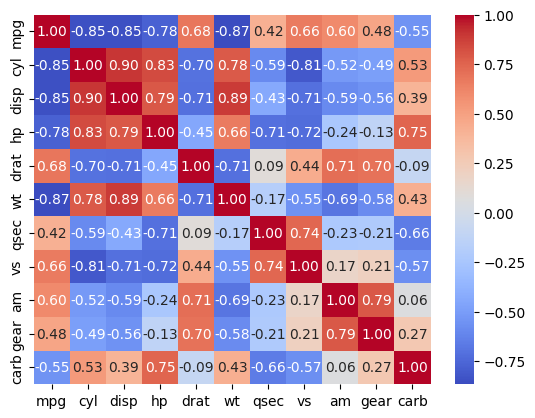

In [5]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

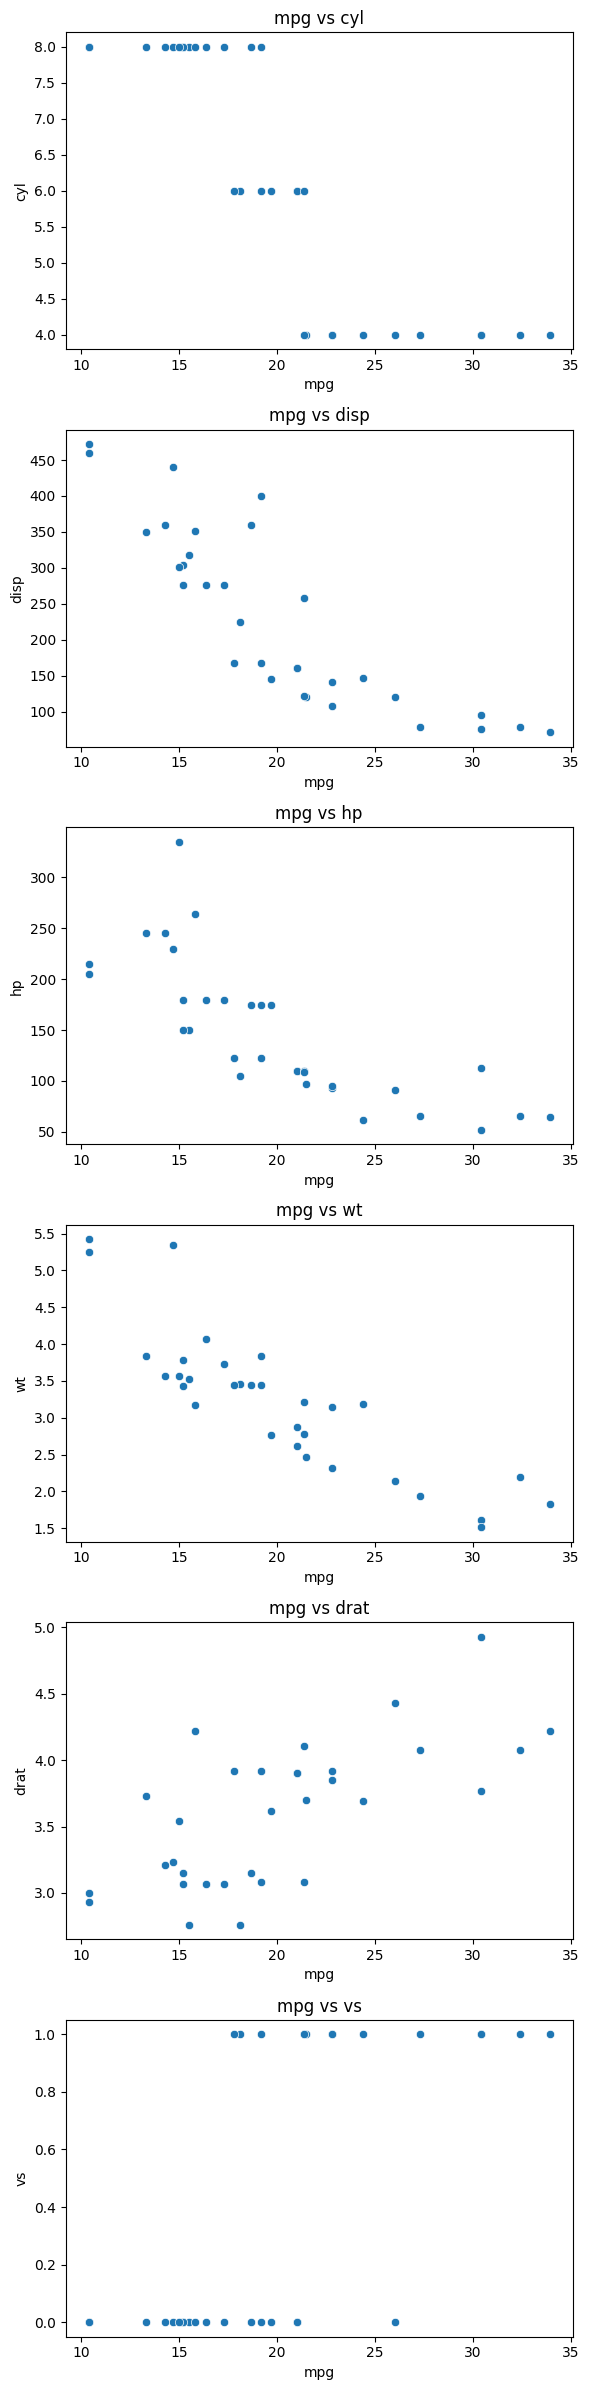

In [6]:
column_pairs = [('mpg','cyl'),('mpg','disp'),('mpg','hp'),('mpg','wt'),('mpg','drat'),('mpg','vs')]
n_plots = len(column_pairs)
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6,4 * n_plots))

for i, pair in enumerate(column_pairs):
  x_col, y_col = pair
  sns.scatterplot(x=x_col, y=y_col,data=df, ax=axes[i])
  axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()

In [7]:
#aic 156.6 bic 162.5
#modelo = sm.ols(formula='mpg ~ wt + disp + hp', data=base)

#aic 165.1  bic 169.5
#modelo = sm.ols(formula='mpg ~ disp + cyl', data=base)

#aic 179.1  bic 183.5
modelo = sm.ols(formula='mpg ~ drat + vs', data=df)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           5.82e-07
Time:                        19:24:43   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

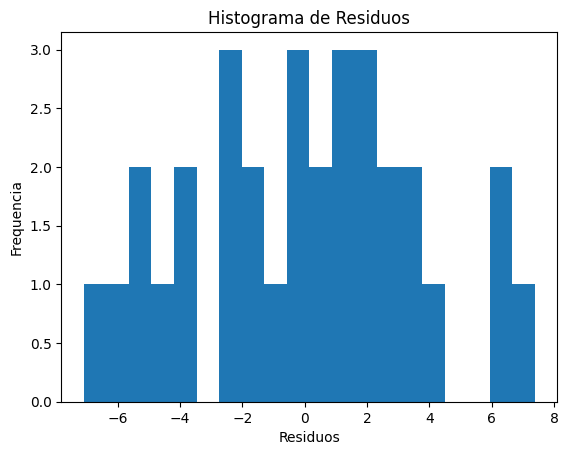

In [8]:
residuos = modelo.resid
plt.hist(residuos, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frequencia")
plt.title("Histograma de Residuos")
plt.show()

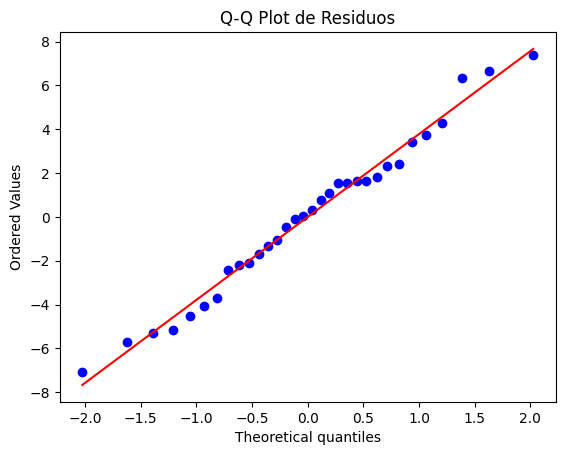

In [9]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de Residuos")
plt.show()

In [10]:
# h0 - dados estão normalmente distribuídos
# p <= 0.05 rejeito a hipótese nula, (não estão normalmente distribuídos)
# p > 0.05 não é possível rejeitar a h0
stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk statística: {stat:.3f}, p-value: {pval:.3f}')

Shapiro-Wilk statística: 0.981, p-value: 0.822


### IMPORT

In [ ]:
df = pd.read_csv('.\\data\\insurance.csv')
df.head()

In [5]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
# df.head()

In [ ]:
df.shape

In [7]:
# Divide em variáveis dependentes e independentes
y = df['Accident'] # Variável dependente
x = df.drop(columns=['Accident'], axis=1) # Variáveis independentes

In [8]:
# Aplica o LabelEncoder para transformar as variáveis categóricas em numéricas
label_encoder = LabelEncoder() # Instancia o LabelEncoder

x = x.apply(label_encoder.fit_transform) # Aplica o LabelEncoder em todas as colunas
y = label_encoder.fit_transform(y) # Aplica o LabelEncoder na variável dependente

In [9]:
# transforma em array para poder passar para o modelo
x = np.array(x)
y = np.array(y)

In [10]:
# Divide em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

### 1) Naive Bayes

In [ ]:
# instacia o modelo e aplica o treinamento considerando os dados de treino
modelo = GaussianNB()
modelo.fit(x_treino, y_treino) # a função fit treina o modelo

In [154]:
# Aplica o modelo treinado para fazer a predição
resultado = modelo.predict(x_teste) # a função predict faz a predição

In [155]:
# Avalia o modelo
acuracia = accuracy_score(y_teste, resultado) # a função accuracy_score compara y_teste e o resultado da predição (y_saida) 
precision = precision_score(y_teste, resultado, average='weighted')
recall = recall_score(y_teste, resultado, average='weighted')
f1 = f1_score(y_teste, resultado, average='weighted')

In [ ]:
print(f'Acuracia : {acuracia :.2f} \nPrecision: {precision:.2f} \nRecall: {recall :.2f} \nF1-Score: {f1 :.2f}' )


In [ ]:
report = classification_report(y_teste, resultado)
print(report) 
#macro avg: média simples da coluna de cima

In [ ]:
matrisc = confusion_matrix(y_teste, resultado)

#  no_reducion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matrisc, annot=True, fmt='d', cmap='magma', cbar=False, )
plt.title('GaussianNB - Matriz de Confusão ')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Decision Tree 

In [ ]:
modelo = DecisionTreeClassifier(random_state=1)
modelo.fit(x_treino, y_treino)

In [171]:
# Aplica o modelo treinado para fazer a predição
resultado = modelo.predict(x_teste) # a função predict faz a predição

In [172]:
# Avalia o modelo
acuracia = accuracy_score(y_teste, resultado) # a função accuracy_score compara y_teste e o resultado da predição (y_saida) 
precision = precision_score(y_teste, resultado, average='weighted')
recall = recall_score(y_teste, resultado, average='weighted')
f1 = f1_score(y_teste, resultado, average='weighted')

In [ ]:
print(f'Acuracia : {acuracia :.2f} \nPrecision: {precision:.2f} \nRecall: {recall :.2f} \nF1-Score: {f1 :.2f}' )


In [ ]:
report = classification_report(y_teste, resultado)
print(report) 
#macro avg: média simples da coluna de cima

In [ ]:
data = export_graphviz(modelo, out_file=None, feature_names=df.columns[:-1], class_names=True, rounded=True)
graph = graphviz.Source(data)
graph.render('decision_tree_graphivz', format = 'png')

### Random Forest

In [ ]:
# rodar primeiro e deixar salvo os resultados
# modelo = RandomForestClassifier(random_state=1, n_estimators=500) 

# rodar depois do primeiro e compara os resultados
modelo = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=8, max_leaf_nodes=8)
modelo.fit(x_treino, y_treino)

In [134]:
resultado = modelo.predict(x_teste)

In [135]:
# Avalia o modelo
acuracia = accuracy_score(y_teste, resultado) # a função accuracy_score compara y_teste e o resultado da predição (y_saida) 
precision = precision_score(y_teste, resultado, average='weighted')
recall = recall_score(y_teste, resultado, average='weighted')
f1 = f1_score(y_teste, resultado, average='weighted')
print(f'Acuracia : {acuracia :.2f} \nPrecision: {precision:.2f} \nRecall: {recall :.2f} \nF1-Score: {f1 :.2f}' )

In [ ]:
# visualizar a arvore de decisão
tree_index = 0
visualizacao_tree = modelo.estimators_[tree_index]


In [ ]:
plt.figure(figsize=(20,10))
plot_tree(visualizacao_tree, filled=True,feature_names=df.columns[:-1], rounded=True )
plt.show()

* Classificação baseda em instancia.
### KNN-neighborns

In [3]:
df = pd.read_csv('.\\data\\mt_cars.csv')
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
y = df['cyl'].values
x = df[['mpg','hp']].values

In [5]:
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

In [7]:
resultado = modelo.predict(x)
resultado

array([6, 6, 4, 6, 8, 6, 8, 4, 4, 6, 6, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 8,
       8, 8, 8, 4, 4, 4, 8, 8, 8, 6])

In [9]:
acuracia = accuracy_score(y, resultado) # a função accuracy_score compara y_teste e o resultado da predição (y_saida)
print(f'Acuracia : {acuracia :.2f}')
precision = precision_score(y, resultado, average='weighted')
print(f'Precision: {precision:.2f}')
recall = recall_score(y, resultado, average='weighted')
print(f'Precision: {recall:.2f}')
f1 = f1_score(y, resultado, average='weighted')
print(f'F1-Score: {f1:.2f}')

Acuracia : 0.94
Precision: 0.94
Precision: 0.94
F1-Score: 0.94


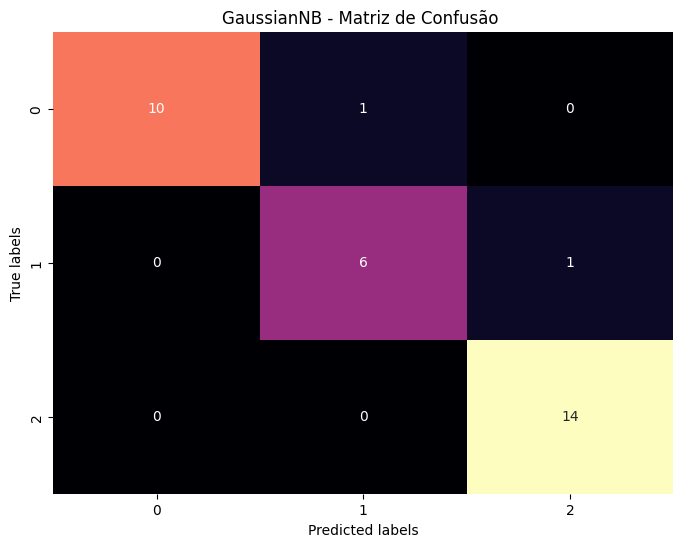

In [10]:
matrisc = confusion_matrix(y, resultado)

#  no_reducion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matrisc, annot=True, fmt='d', cmap='magma', cbar=False, )
plt.title('KNN- Matriz de Confusão ')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
ne

### K-means
* Agrupamento ou Clusterização

Primeiro, define-se o número de clusters. Em seguida, o algoritmo determina os centros de cada cluster. Após isso, calcula-se a distância de cada ponto até o centróide. Com todas as distâncias calculadas, é feita a média das distâncias para todos os grupos. O algoritmo continua a rodar até que os pontos não mudem mais de posição ou até atingir um critério de parada específico.

In [38]:
# df = pd.read_csv('.\\data\\iris.csv')
df = datasets.load_iris()
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
def plot_clusters(data, labels, title):
  colors = ['red','green','purple','black']
  plt.figure(figsize=(8,4))
  for i,c,l in zip(range(-1,3), colors, ['Noise','Setosa','Versicolor','Virginica']):
    if i == -1:
      plt.scatter(data[labels == i, 0], data[labels == i, 3], c=colors[i], label = l, alpha=0.5, s=50, marker='x')
    else:
      plt.scatter(data[labels == i, 0], data[labels == i, 3], c=colors[i], label = l, alpha=0.5, s=50)
  plt.legend()
  plt.title(title)
  plt.xlabel('Comprimento Sépala')
  plt.ylabel("Largura da Pétala")
  plt.show()

In [30]:
kmeans = KMeans(n_clusters=3,n_init='auto') # parametro mais importante é o n_clusters
kmeans.fit(df.data)
print(kmeans.labels_)
resultados = confusion_matrix(df.target, kmeans.labels_)
print(resultados)

# plot_clusters(df.data, kmeans.labels_, 'Cluster KMeans')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


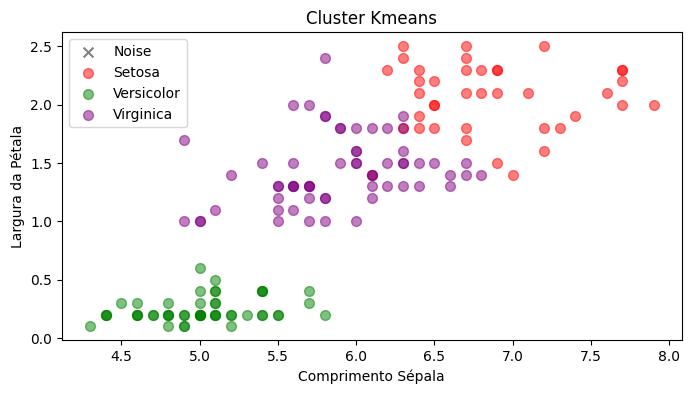

In [31]:
plot_clusters(df.data, kmeans.labels_ ,'Cluster Kmeans')

In [25]:
# DBSCAN é um outro algoritmo de clusterização, ele difere do KMeans por não precisar definir o número de clusters, porem ele pode gerar ruindo se os dados não forem bem tratados
dbscan = DBSCAN(eps=0.5, min_samples=5) # eps = raio de vizinhança, min_samples = número mínimo de pontos para formar um cluster
dbscan_resultado = dbscan.fit_predict(df.data)
print(dbscan_resultado)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


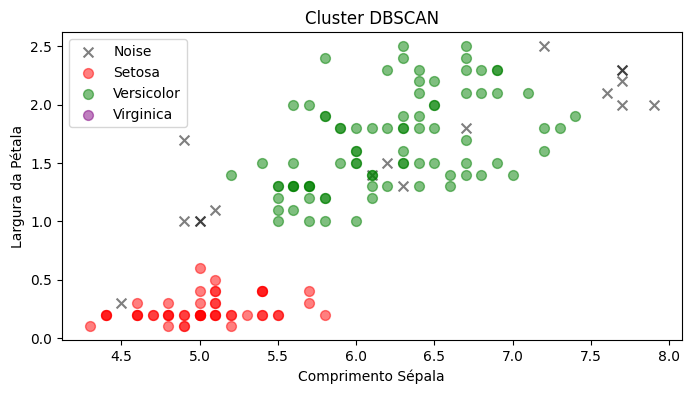

In [32]:
plot_clusters(df.data, dbscan_resultado, 'Cluster DBSCAN')

In [39]:
# clusterização aglomerativa (Hierárquica)
aglo = AgglomerativeClustering(n_clusters=3)
aglo_resultado = aglo.fit_predict(df.data)
print(aglo_resultado)
aglo_resultado = confusion_matrix(df.target, aglo_resultado)
print(aglo_resultado)

# agglo = AgglomerativeClustering(n_clusters=3)
# agglo_labels = agglo.fit_predict(iris.data)
# print(agglo_labels)
# resultados = confusion_matrix(iris.target,agglo_labels)
# print(resultados)
# plot_clusters(iris.data,agglo_labels,'Cluster Hierárquico' )

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[ 0 50  0]
 [49  0  1]
 [15  0 35]]


In [ ]:
plot_clusters(df.data, aglo_resultado, 'Cluster Aglomerativo')

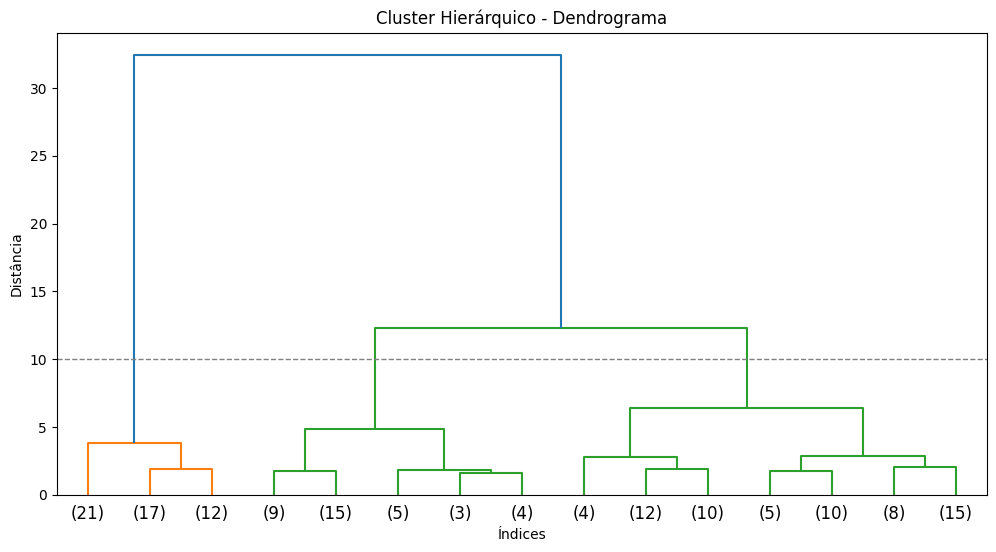

In [35]:
plt.figure(figsize=(12,6))
plt.title('Cluster Hierárquico - Dendrograma')
plt.xlabel('Índices')
plt.ylabel('Distância')
linkage_matrix = linkage(df.data, method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=15)
plt.axhline(y=10, c='gray', lw=1, linestyle='dashed')
plt.show()

## Seção 4


In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Engenharia de atributos

In [42]:
#
df = pd.read_csv('.\\data\\credit_simple.csv', sep=';')
df.head()

,SALDO_ATUAL,RESIDENCIADESDE,IDADE,OUTROSPLANOSPGTO,DATA,ESTADOCIVIL,PROPOSITO,CLASSE
0,1169.0,4,67,nenhum,01/01/2019,masculino solteiro,radio/tv,bom
1,5951.0,2,22,nenhum,01/01/2020,fem div/cas,radio/tv,ruim
2,2096.0,3,49,nenhum,02/01/2020,masculino solteiro,educação,bom
3,7882.0,4,45,nenhum,02/01/2019,masculino solteiro,mobilia/equipamento,bom
4,4870.0,4,53,nenhum,03/01/2018,masculino solteiro,carro novo,ruim


In [43]:
y = df['CLASSE']
x = df.drop(columns=['CLASSE'], axis=1)

* Preenchendo valores nulos

In [44]:
x.isnull().sum()

SALDO_ATUAL         7
RESIDENCIADESDE     0
IDADE               0
OUTROSPLANOSPGTO    0
DATA                0
ESTADOCIVIL         8
PROPOSITO           0
dtype: int64

In [46]:
# Subistitui os valores NAN da coluna SALDO_ATUAL pela média
mediana = x['SALDO_ATUAL'].median()
x['SALDO_ATUAL'] = x['SALDO_ATUAL'].fillna(mediana)
x.isnull().sum()

SALDO_ATUAL         0
RESIDENCIADESDE     0
IDADE               0
OUTROSPLANOSPGTO    0
DATA                0
ESTADOCIVIL         8
PROPOSITO           0
dtype: int64

In [51]:
# subistitui os valores NAN da coluna ESTADOCIVIL pela moda
# MODA: valor que mais se repete.
moda = x.groupby(['ESTADOCIVIL']).size()
moda

ESTADOCIVIL
fem div/cas               308
masculino casado/viuvo     92
masculino div/sep          50
masculino solteiro        542
dtype: int64

In [52]:
x['ESTADOCIVIL'] = x['ESTADOCIVIL'].fillna('masculino solteiro')

* Outliers

In [54]:
desvio = x['SALDO_ATUAL'].std()
print(desvio)

np.float64(685936688.9820067)

In [57]:
# print(mediana)
# mediana = x['SALDO_ATUAL'].median()
# print(mediana)
x.loc[x['SALDO_ATUAL'] >= 2*desvio, 'SALDO_ATUAL'] = mediana
x.loc[x['SALDO_ATUAL'] >= 2*desvio]

,SALDO_ATUAL,RESIDENCIADESDE,IDADE,OUTROSPLANOSPGTO,DATA,ESTADOCIVIL,PROPOSITO


* 1 - **SELEÇÃO DE ATRIBUTOS**


In [77]:
from sklearn.feature_selection import SelectKBest, chi2

In [78]:
df = pd.read_csv('.\\data\\ad.data',header=None)
df.head()
df.shape

(3279, 1559)

In [79]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [80]:
x

array([[125.    , 125.    ,   1.    , ...,   0.    ,   0.    ,   0.    ],
       [ 57.    , 468.    ,   8.2105, ...,   0.    ,   0.    ,   0.    ],
       [ 33.    , 230.    ,   6.9696, ...,   0.    ,   0.    ,   0.    ],
       ...,
       [ 23.    , 120.    ,   5.2173, ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [ 40.    ,  40.    ,   1.    , ...,   0.    ,   0.    ,   0.    ]])

In [81]:
y

array(['ad.', 'ad.', 'ad.', ..., 'nonad.', 'nonad.', 'nonad.'],
      dtype=object)

1.1 - **SELEÇÃO COM TODO O CONJUNTO DE ATRIBUTOS**

In [82]:
x_treino, x_teste, y_treino,y_teste = train_test_split(x,y ,test_size=0.3, random_state=0)

In [83]:
modelo = GaussianNB()
modelo.fit(x_treino, y_treino)
resultado = modelo.predict(x_teste)

In [84]:
# Avalia o modelo
acuracia = accuracy_score(y_teste, resultado) # a função accuracy_score compara y_teste e o resultado da predição (y_saida) 
precision = precision_score(y_teste, resultado, average='weighted')
recall = recall_score(y_teste, resultado, average='weighted')
f1 = f1_score(y_teste, resultado, average='weighted')
print(f'Acuracia : {acuracia :.2f} \nPrecision: {precision:.2f} \nRecall: {recall :.2f} \nF1-Score: {f1 :.2f}' )

Acuracia : 0.78 
Precision: 0.90 
Recall: 0.78 
F1-Score: 0.81


1.2 - **SELEÇÃO COM UM SUBCONJUNTO O CONJUNTO DE ATRIBUTOS**

In [85]:
# faz a seleção de features (colunas) mais importantes com base no teste qui-quadrado
selecao = SelectKBest(chi2, k=7) # k = número de features que deseja manter
x_novo = selecao.fit_transform(x,y)

In [74]:
x_novo.shape


(3279, 7)

In [86]:
x_treino, x_teste, y_treino,y_teste = train_test_split(x_novo,y ,test_size=0.3, random_state=0)

In [87]:
modelo = GaussianNB()
modelo.fit(x_treino, y_treino)
resultado = modelo.predict(x_teste)

In [88]:
# Avalia o modelo
acuracia = accuracy_score(y_teste, resultado) # a função accuracy_score compara y_teste e o resultado da predição (y_saida) 
precision = precision_score(y_teste, resultado, average='weighted')
recall = recall_score(y_teste, resultado, average='weighted')
f1 = f1_score(y_teste, resultado, average='weighted')
print(f'Acuracia : {acuracia :.2f} \nPrecision: {precision:.2f} \nRecall: {recall :.2f} \nF1-Score: {f1 :.2f}' )

Acuracia : 0.95 
Precision: 0.94 
Recall: 0.95 
F1-Score: 0.94


Houve melhora siginificativa no resultado apos seleção dos atributos.

**ANTES** -  (Acuracia : 0.78 - Precision: 0.90 - Recall: 0.78 -F1-Score: 0.81)

**DEPOIS** - (Acuracia : 0.95 - Precision: 0.94 -Recall: 0.95 - F1-Score: 0.94)

### Técnicas de Agruamento

In [110]:
from sklearn.preprocessing import scale
from hopkins import *
from metric import *
# from visual_assessment_of_tendency import *
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.cluster import KMeans

In [94]:
df = datasets.load_iris()
clust_1 = scale(df.data)
clust_2 = scale(np.random.rand(150,4))

In [95]:
clust_2

array([[-4.67419302e-01,  1.17486349e+00,  1.24824385e+00,
        -1.66906274e+00],
       [-1.11310542e+00,  5.97455850e-01,  1.54382536e+00,
        -3.35256964e-01],
       [-1.02023478e-02,  1.16023814e+00, -2.57710168e-01,
        -2.75335413e-01],
       [ 1.59157562e+00, -1.43351698e+00,  1.43733508e+00,
         1.41789232e+00],
       [ 8.24824367e-01, -7.78170223e-01, -1.59864244e+00,
        -9.53035121e-01],
       [ 9.74099413e-01, -6.52042330e-01, -5.57834140e-02,
         5.26859944e-01],
       [-1.52137263e+00,  4.68819392e-01, -4.08390901e-02,
         6.82309833e-01],
       [ 1.15739875e+00,  2.15369887e-01,  6.86867284e-01,
        -5.78868763e-01],
       [-1.73594423e+00, -5.27544801e-01,  5.61797472e-01,
        -1.53824388e+00],
       [ 7.75074370e-01, -1.02567449e+00,  9.96389170e-01,
        -4.42651885e-01],
       [ 1.05700474e+00, -1.27777870e+00,  1.51146638e+00,
         1.51756485e+00],
       [ 1.07936592e+00, -1.03547304e+00,  7.29368315e-01,
      

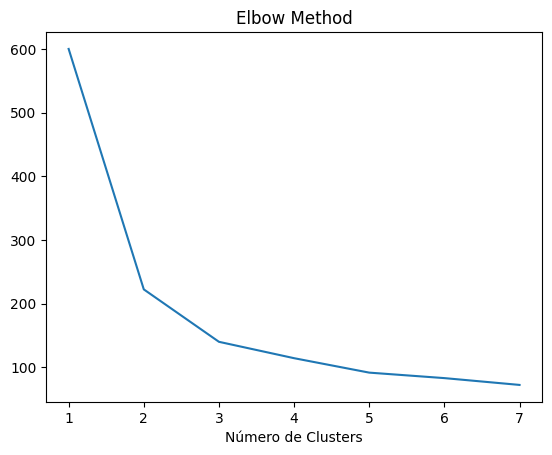

In [96]:
inertia = []
for i in range(1,8):
  modelo = KMeans(n_clusters=i, n_init='auto')
  modelo.fit(clust_1)
  inertia.append(modelo.inertia_)
plt.plot(range(1,8), inertia) #, marker='o'
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.show()

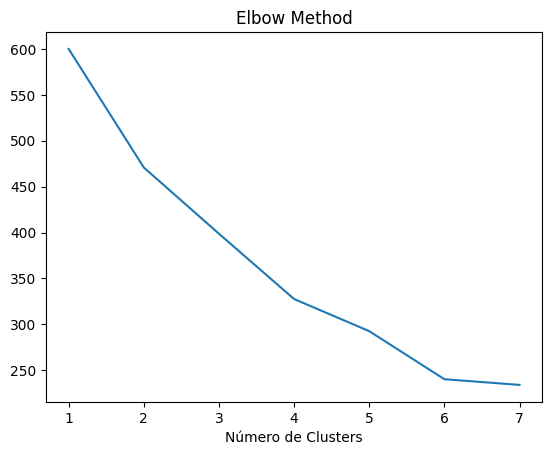

In [97]:
inertia = []
for i in range(1,8):
  modelo = KMeans(n_clusters=i, n_init='auto')
  modelo.fit(clust_2)
  inertia.append(modelo.inertia_)
plt.plot(range(1,8), inertia) #, marker='o'
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.show()

In [102]:
# a função hopkins retorna um valor entre 0 e 1, quanto mais próximo de 1, mais os dados são clusterizáveis
print(hopkins(clust_1, 150))
print(hopkins(clust_2, 150))

0.1863396503093524
0.4874145330968097


In [ ]:
# # vat(clust_1)
# # vat(clust_2)
# ivat(clust_1)
# ivat(clust_2)

Tecnica indica o numero ideal de clusters.

In [107]:
# retorna o numero de clustaers mais adequado
m = assess_tendency_by_metric(clust_1, 'silhouette',5)
print(m) # retornou 2 clusters
m = assess_tendency_by_metric(clust_1, 'davies_bouldin',5)
print(m) # retornou 2 clusters
m = assess_tendency_by_metric(clust_1, 'calinski_harabasz',5)
print(m) # retornou 2 clusters

(np.int64(2), array([0.58175005, 0.45663381, 0.38349421, 0.34871861]))
(np.int64(2), array([0.59331269, 0.83400015, 1.01558682, 0.92101962]))
(np.int64(2), array([251.34933946, 239.48453205, 206.55006422, 166.46516533]))


In [108]:
# retorna o numero de clustaers mais adequado
m = assess_tendency_by_metric(clust_2, 'silhouette',5)
print(m) # retornou 2 clusters
m = assess_tendency_by_metric(clust_2, 'davies_bouldin',5)
print(m) # retornou 2 clusters
m = assess_tendency_by_metric(clust_2, 'calinski_harabasz',5)
print(m) # retornou 2 clusters

(np.int64(5), array([0.18488874, 0.19341725, 0.20559186, 0.22244681]))
(np.int64(5), array([1.94523879, 1.52329002, 1.36138246, 1.33414658]))
(np.int64(4), array([34.62493843, 37.39840534, 43.23302841, 41.75520033]))


In [116]:
# Faz a média dos tres metodos e retornar o numero de clustaers mais adequado
m = assess_tendency_by_mean_metric_score(clust_1,5)
print('A média de cluster é:',m) # retornou 2 clusters
# retorna o numero de clustaers mais adequado
m = assess_tendency_by_mean_metric_score(clust_2,5)
print('A média de cluster é: ',m) # retornou 2 clusters


A média de cluster é: 2.0
A média de cluster é:  5.0


### Escolha do melhor metodo de clusterização

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [119]:
def compare_algorithms(X, max_clusters):
  results = []
  cluster_range = range(2, max_clusters +1)

  #kmeans
  for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    clusters = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    results.append(('KMeans',n_clusters,silhouette_avg))
  
  #agglomerativo
  for n_clusters in cluster_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = agglomerative.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    results.append(('Agglomerative',n_clusters,silhouette_avg))

  #dbscan
  eps_values = np.arange(0.1,0.9,0.1)
  for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X)
    if len(set(clusters)) > 1:
      silhouette_avg = silhouette_score(X, clusters)
      results.append(('DBSCAN',eps,silhouette_avg))

  return results
     

In [122]:
df = datasets.load_iris()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.data)

resultado = compare_algorithms(scaled_data, 10)

resultado = pd.DataFrame(resultado, columns=['Agrupado','Clusters','Score'])
resultado

,Agrupado,Clusters,Score
0,KMeans,2.0,0.581750
1,KMeans,3.0,0.459948
2,KMeans,4.0,0.386941
3,KMeans,5.0,0.345511
4,KMeans,6.0,0.343719
5,KMeans,7.0,0.329236
6,KMeans,8.0,0.335194
7,KMeans,9.0,0.352488
8,KMeans,10.0,0.348607
9,Agglomerative,2.0,0.577035


In [126]:
resultado.loc[resultado['Score'].idxmax()]


Agrupado     KMeans
Clusters        2.0
Score       0.58175
Name: 0, dtype: object

### Mult labels

In [1]:
import pandas as pd

from skmultilearn.adapt import MLARAM

from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset
from sklearn.svm import SVC
# import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss

In [2]:
df = pd.read_csv(".\\data\\Musica.csv")
df.shape

(592, 77)

In [3]:
df.head()

,amazed-suprised,happy-pleased,relaxing-clam,quiet-still,sad-lonely,angry-aggresive,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,...,Std_Acc1298_Std_Mem40_MFCC_10,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BHSUM1,BHSUM2,BHSUM3
0,0,1,1,0,0,0,0.132498,0.077848,0.229227,0.602629,...,0.197026,0.196244,0.164323,0.030017,0.253968,0.008473,0.240602,0.136735,0.058442,0.107594
1,1,0,0,0,0,1,0.384281,0.355249,0.167190,0.853089,...,0.093526,0.085649,0.025101,0.182955,0.285714,0.156764,0.270677,0.191377,0.153728,0.197951
2,0,1,0,0,0,1,0.541782,0.356491,0.152246,0.791142,...,0.198082,0.108067,0.140574,0.099303,0.142857,0.000000,0.593985,0.105114,0.025555,0.122965
3,0,0,1,0,0,0,0.174288,0.243935,0.254326,0.438987,...,0.235793,0.220195,0.235834,0.024988,0.222222,0.117169,0.210526,0.057288,0.134575,0.091509
4,0,0,0,1,0,0,0.347436,0.155448,0.100047,0.126026,...,0.715683,0.573359,0.412368,0.016398,0.761905,0.081703,0.721805,0.108737,0.172882,0.189934


In [4]:
classe = df.iloc[:,0:6].values
previsores = df.iloc[:,7:78].values
classe

array([[0, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1],
       ...,
       [0, 0, 1, 1, 1, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [5]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state=0)

In [7]:
import numpy as np

# Ensure compatible version of scipy
# %pip install scipy==1.4.1

ann = MLARAM()
ann.fit(X_treinamento, y_treinamento)

AttributeError: Module 'scipy' has no attribute 'ones'

In [ ]:
previsto = ann.predict(X_teste)
print(hamming_loss(y_teste,previsto))

0.24906367041198502


In [ ]:
binary = BinaryRelevance(classifier=SVC())
binary.fit(X_treinamento, y_treinamento)
previsao = binary.predict(X_teste)
print(hamming_loss(y_teste,previsao))

0.199438202247191


In [ ]:
chain = ClassifierChain(classifier=SVC())
chain.fit(X_treinamento, y_treinamento)
previsoes = chain.predict(X_teste)
print(hamming_loss(y_teste,previsoes))

0.2340823970037453


In [ ]:
label = LabelPowerset(classifier = SVC())
label.fit(X_treinamento, y_treinamento)
previsoes = label.predict(X_teste)
print(hamming_loss(y_teste, previsoes))

0.2209737827715356


### Dados desbalanceados

In [8]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC #pip install imbalanced-learn #remover ao final do curso

In [10]:
df = pd.read_csv(".\\data\\credit_simple.csv", sep=';')
df.head()

,SALDO_ATUAL,RESIDENCIADESDE,IDADE,OUTROSPLANOSPGTO,DATA,ESTADOCIVIL,PROPOSITO,CLASSE
0,1169.0,4,67,nenhum,01/01/2019,masculino solteiro,radio/tv,bom
1,5951.0,2,22,nenhum,01/01/2020,fem div/cas,radio/tv,ruim
2,2096.0,3,49,nenhum,02/01/2020,masculino solteiro,educação,bom
3,7882.0,4,45,nenhum,02/01/2019,masculino solteiro,mobilia/equipamento,bom
4,4870.0,4,53,nenhum,03/01/2018,masculino solteiro,carro novo,ruim


In [14]:
# count = df.groupby(['CLASSE']).size()
df['CLASSE'].value_counts()

CLASSE
bom     700
ruim    300
Name: count, dtype: int64

In [13]:
df['CLASSE'].value_counts()

CLASSE
bom     700
ruim    300
Name: count, dtype: int64

In [16]:
y = df['CLASSE'].values
X = df.iloc[:,:-1].values

In [17]:
labelencoder = LabelEncoder()
for i in range(X.shape[1]):
  if X[:,i].dtype == 'object':
    X[:,i] = labelencoder.fit_transform(X[:,i])

In [18]:
sm = SMOTENC(random_state=0, categorical_features=[3,5,6])
X_res, y_res = sm.fit_resample(X,y)

In [19]:
X_res

array([[140.0, 3.0, 49.0, ..., 0.0, 3, 9],
       [765.0, 1.0, 4.0, ..., 1.0, 0, 9],
       [388.0, 2.0, 31.0, ..., 13.0, 3, 3],
       ...,
       [80.39981214000933, 1.7996242800186615, 4.200375719981339, ...,
        34.99248560037323, 0, 1],
       [897.9858495639895, 3.0, 26.042451308031378, ...,
        140.35691739335076, 0, 2],
       [462.1024631463796, 1.9658456178734771, 5.6894362547510156, ...,
        297.2700607509019, 0, 4]], dtype=object)

In [20]:
df = pd.DataFrame({'CLASSE': y_res})
df.value_counts()

CLASSE
bom       700
ruim      700
Name: count, dtype: int64

## Seção 5: Redes Neurais, Deep Learning e Cuputer Vision

In [4]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# from keras.datasets import cifar10
# from keras.utils import np_utils
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

### MLP

In [5]:
df = datasets.load_iris()
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df.data, df.target,
                                                                  test_size=0.3, random_state=0)

In [6]:
modelo = MLPClassifier(
    verbose=True,
    hidden_layer_sizes=(5,4),
    activation='relu',
    batch_size=20,
    learning_rate='adaptive',
    momentum=0.9,
    early_stopping=False,
    max_iter=1000,
    random_state=10
)

modelo.fit(X_treinamento, y_treinamento)

Iteration 1, loss = 1.86199863
Iteration 2, loss = 1.78774059
Iteration 3, loss = 1.71916423
Iteration 4, loss = 1.65482437
Iteration 5, loss = 1.59646768
Iteration 6, loss = 1.54494999
Iteration 7, loss = 1.49711949
Iteration 8, loss = 1.45115777
Iteration 9, loss = 1.41039240
Iteration 10, loss = 1.37009929
Iteration 11, loss = 1.33470225
Iteration 12, loss = 1.29813287
Iteration 13, loss = 1.26521765
Iteration 14, loss = 1.23785768
Iteration 15, loss = 1.21723789
Iteration 16, loss = 1.20077631
Iteration 17, loss = 1.18917561
Iteration 18, loss = 1.17892593
Iteration 19, loss = 1.17039574
Iteration 20, loss = 1.16311270
Iteration 21, loss = 1.15636507
Iteration 22, loss = 1.15022374
Iteration 23, loss = 1.14390052
Iteration 24, loss = 1.13758739
Iteration 25, loss = 1.13104511
Iteration 26, loss = 1.12496344
Iteration 27, loss = 1.11836293
Iteration 28, loss = 1.11233657
Iteration 29, loss = 1.10685832
Iteration 30, loss = 1.10070925
Iteration 31, loss = 1.09485627
Iteration 32, los

MLPClassifier(batch_size=20, hidden_layer_sizes=(5, 4),
              learning_rate='adaptive', max_iter=1000, random_state=10,
              verbose=True)

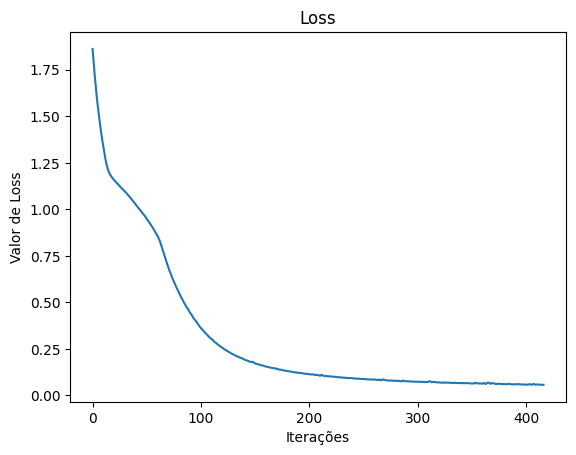

In [7]:
plt.plot(modelo.loss_curve_)
plt.xlabel("Iterações")
plt.ylabel("Valor de Loss")
plt.title("Loss")
plt.show()

In [8]:
previsoes = modelo.predict(X_teste)
previsoes

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [9]:
print(accuracy_score(y_teste,previsoes))

0.9777777777777777


### Keras

In [ ]:
print('Hallo Welt')

In [21]:
# import keras  
import tensorflow as tf
print(tf. __version__)
# print(keras. __version__)

ModuleNotFoundError: No module named 'tensorflow'

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
df = pd.read_csv("Churn_treino.csv", sep=";")
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0,1,1,1,10134888,1
1,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,699,France,Female,39,1,0,2,0,0,9382663,0
4,850,Spain,Female,43,2,12551082,1,1,1,790841,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0,2,1,0,9627064,0
9996,516,France,Male,35,10,5736961,1,1,1,10169977,0
9997,709,France,Female,36,7,0,1,0,1,4208558,1
9998,772,Germany,Male,42,3,7507531,2,1,0,9288852,1


In [ ]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0,1,1,1,10134888
1,608,Spain,Female,41,1,8380786,1,0,1,11254258
2,502,France,Female,42,8,1596608,3,1,0,11393157
3,699,France,Female,39,1,0,2,0,0,9382663
4,850,Spain,Female,43,2,12551082,1,1,1,790841
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0,2,1,0,9627064
9996,516,France,Male,35,10,5736961,1,1,1,10169977
9997,709,France,Female,36,7,0,1,0,1,4208558
9998,772,Germany,Male,42,3,7507531,2,1,0,9288852


In [ ]:
standarscaler = StandardScaler()
numerical = X.select_dtypes(include=['int64','float64']).columns
X[numerical] = standarscaler.fit_transform(X[numerical])

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,France,Female,0.293517,-1.041760,-1.110553,-0.911583,0.646092,0.970243,0.170614
1,-0.440036,Spain,Female,0.198164,-1.387538,0.222782,-0.911583,-1.547768,0.970243,0.353281
2,-1.536794,France,Female,0.293517,1.032908,-0.856542,2.527057,0.646092,-1.030670,0.375948
3,0.501521,France,Female,0.007457,-1.387538,-1.110553,0.807737,-1.547768,-1.030670,0.047859
4,2.063884,Spain,Female,0.388871,-1.041760,0.886252,-0.911583,0.646092,0.970243,-1.354223
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,France,Male,0.007457,-0.004426,-1.110553,0.807737,0.646092,-1.030670,0.087743
9996,-1.391939,France,Male,-0.373958,1.724464,-0.197835,-0.911583,0.646092,0.970243,0.176340
9997,0.604988,France,Female,-0.278604,0.687130,-1.110553,-0.911583,-1.547768,0.970243,-0.796492
9998,1.256835,Germany,Male,0.293517,-0.695982,0.083852,0.807737,0.646092,-1.030670,0.032551


In [ ]:
labelencoder = LabelEncoder()
categorical = X.select_dtypes(include='object').columns
for col in categorical:
  X[col] = labelencoder.fit_transform(X[col])

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0,0,0.293517,-1.041760,-1.110553,-0.911583,0.646092,0.970243,0.170614
1,-0.440036,2,0,0.198164,-1.387538,0.222782,-0.911583,-1.547768,0.970243,0.353281
2,-1.536794,0,0,0.293517,1.032908,-0.856542,2.527057,0.646092,-1.030670,0.375948
3,0.501521,0,0,0.007457,-1.387538,-1.110553,0.807737,-1.547768,-1.030670,0.047859
4,2.063884,2,0,0.388871,-1.041760,0.886252,-0.911583,0.646092,0.970243,-1.354223
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007457,-0.004426,-1.110553,0.807737,0.646092,-1.030670,0.087743
9996,-1.391939,0,1,-0.373958,1.724464,-0.197835,-0.911583,0.646092,0.970243,0.176340
9997,0.604988,0,0,-0.278604,0.687130,-1.110553,-0.911583,-1.547768,0.970243,-0.796492
9998,1.256835,1,1,0.293517,-0.695982,0.083852,0.807737,0.646092,-1.030670,0.032551


In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
modelo = Sequential()
modelo.add(Dense(units=64, activation='relu', input_dim=X_treino.shape[1]))
modelo.add(Dropout(0.4))
modelo.add(Dense(units=32, activation='relu'))
modelo.add(Dropout(0.4))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.4))
modelo.add(Dense(units=1, activation='sigmoid'))

In [ ]:
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelo.fit(X_treino, y_treino, epochs=50, batch_size=32)

In [ ]:
previsoes = modelo.predict(X_teste)
previsoes

94/94 [==============================] - 0s 1ms/step


array([[0.2729271 ],
       [0.26021993],
       [0.18588184],
       ...,
       [0.04589548],
       [0.10005359],
       [0.4677212 ]], dtype=float32)

In [ ]:
y_pred = (previsoes > 0.5).astype('int32')
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
print('Acurácia: ', accuracy_score(y_teste, y_pred))
print('F1: ', f1_score(y_teste, y_pred))
print('Recall: ', recall_score(y_teste, y_pred))
print('Matriz de Confusão: ', confusion_matrix(y_teste, y_pred))

Acurácia:  0.8553333333333333
F1:  0.5850860420650096
Recall:  0.4927536231884058
Matriz de Confusão:  [[2260  119]
 [ 315  306]]


### CNN

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

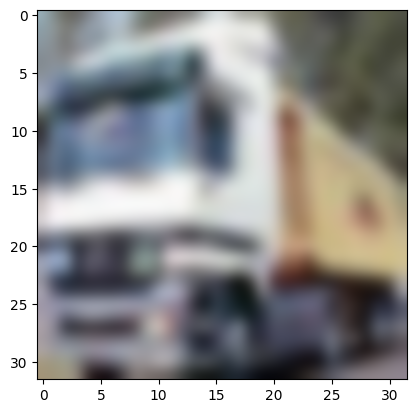

In [ ]:
image = X_train[1]
plt.imshow(image, interpolation='bicubic')
plt.show()

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
modelo = Sequential()

modelo.add(Conv2D(32,(3,3), padding='same',activation='relu', input_shape=(32,32,3)))
modelo.add(Conv2D(32,(3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64,(3,3), padding='same',activation='relu'))
modelo.add(Conv2D(64,(3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.25))

modelo.add(Flatten())
modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(10, activation='softmax'))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo.fit(X_train, y_train, batch_size=32, epochs=100)

In [ ]:
previsoes = modelo.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
previsoes

array([[5.2874276e-07, 1.2501200e-06, 6.9122972e-05, ..., 1.8689641e-07,
        3.9670256e-05, 6.7904216e-07],
       [6.5305819e-09, 1.1997608e-01, 1.3840510e-28, ..., 4.8159556e-24,
        8.8002390e-01, 2.8378974e-08],
       [7.7819321e-03, 7.9245912e-04, 7.7299616e-09, ..., 6.5405843e-08,
        9.9138719e-01, 2.6353139e-06],
       ...,
       [1.0102723e-12, 5.4150800e-17, 7.7255482e-09, ..., 3.2149399e-07,
        6.2908331e-14, 1.3997218e-12],
       [3.3991724e-05, 9.9996567e-01, 1.5799421e-07, ..., 1.2086389e-08,
        2.6372124e-08, 1.3667237e-07],
       [1.4248997e-25, 1.9405692e-25, 3.5114235e-18, ..., 9.9999964e-01,
        3.4254537e-25, 2.1880785e-22]], dtype=float32)

In [ ]:
previsoes_classes = np.argmax(previsoes, axis=1)
previsoes_classes

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
y_test_classes = np.argmax(y_test, axis = 1)

In [ ]:
y_test_classes

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
accuracy = accuracy_score(y_test_classes,previsoes_classes)
accuracy

0.7779

In [ ]:
confusion = confusion_matrix(y_test_classes,previsoes_classes)

In [ ]:
confusion

array([[780,  11,  50,  33,  19,   8,  14,  17,  54,  14],
       [  9, 877,   3,  12,   6,   3,  13,   3,  29,  45],
       [ 53,   4, 671,  61,  70,  48,  55,  26,   9,   3],
       [ 11,   3,  57, 630,  57, 123,  66,  37,  12,   4],
       [ 11,   0,  52,  59, 740,  33,  42,  54,   6,   3],
       [  7,   1,  41, 166,  35, 682,  24,  38,   3,   3],
       [  3,   0,  31,  60,  20,  15, 857,   6,   7,   1],
       [ 10,   0,  17,  44,  49,  45,   9, 821,   4,   1],
       [ 35,  12,   7,  14,   7,   3,  10,   2, 893,  17],
       [ 18,  59,   8,  23,   3,   9,   3,  12,  37, 828]])

### Auto encoders

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

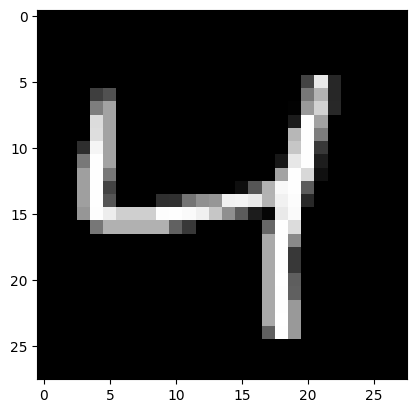

In [ ]:
plt.imshow(X_train[2], cmap='gray')
plt.show()

In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [ ]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [ ]:
x_train_noisy = X_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape )
x_test_noisy = X_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape )

In [ ]:
x_train_noise = np.clip(x_train_noisy,0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy,0.0, 1.0)

In [ ]:
inputs = Input(shape=(784,))
encoder = Dense(32,activation='relu')(inputs)
decoder = Dense(784, activation='sigmoid')(encoder)
autoencoder = Model(inputs, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noise, X_train, epochs=100, batch_size=256, shuffle=True,
                validation_data=(x_test_noisy,X_test))

In [ ]:
idx = np.random.randint(X_test.shape[0])
original_image = X_test[idx]

noisy_image = original_image + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=original_image.shape )
noisy_image = np.clip(noisy_image, 0.0, 1.0)

denoised_image = autoencoder.predict(np.expand_dims(noisy_image, axis=0)) 

denoised_image = denoised_image.reshape((28,28))

1/1 [==============================] - 0s 29ms/step


(-0.5, 27.5, 27.5, -0.5)

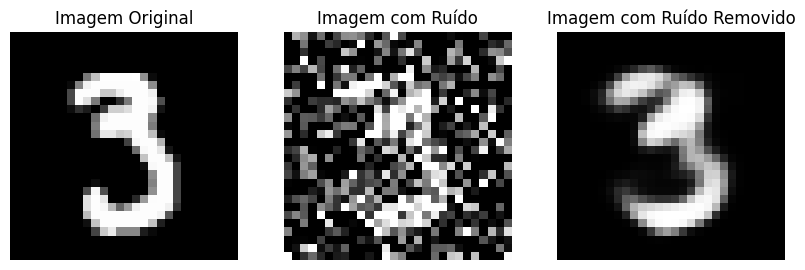

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(original_image.reshape(28,28), cmap='gray')
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(noisy_image.reshape(28,28), cmap='gray')
plt.title("Imagem com Ruído")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(denoised_image, cmap='gray')
plt.title("Imagem com Ruído Removido")
plt.axis("off")

### LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
dataset_train.shape

(1258, 6)

In [ ]:
training_set = dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [ ]:
X_train.shape

(1198, 60)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(1198, 60, 1)

In [ ]:
modelo = Sequential()
modelo.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1],1)))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=50, return_sequences = True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=50, return_sequences = True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=50))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=1))

In [ ]:
modelo.compile(optimizer="adam", loss='mean_squared_error')
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=30)
modelo.fit(X_train, y_train, epochs=500, batch_size=32, callbacks=[es])

Epoch 1/500
38/38 [==============================] - 13s 17ms/step - loss: 0.0462
Epoch 2/500
38/38 [==============================] - 1s 18ms/step - loss: 0.0061
Epoch 3/500
38/38 [==============================] - 1s 18ms/step - loss: 0.0053
Epoch 4/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0061
Epoch 5/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0052
Epoch 6/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0049
Epoch 7/500
38/38 [==============================] - 0s 12ms/step - loss: 0.0047
Epoch 8/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0048
Epoch 9/500
38/38 [==============================] - 0s 12ms/step - loss: 0.0040
Epoch 10/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0039
Epoch 11/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0042
Epoch 12/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0037
Epoch 13/500
38/38 [====

In [ ]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [ ]:
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [ ]:
inputs = inputs.reshape(-1,1)
inputs

In [ ]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = modelo.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


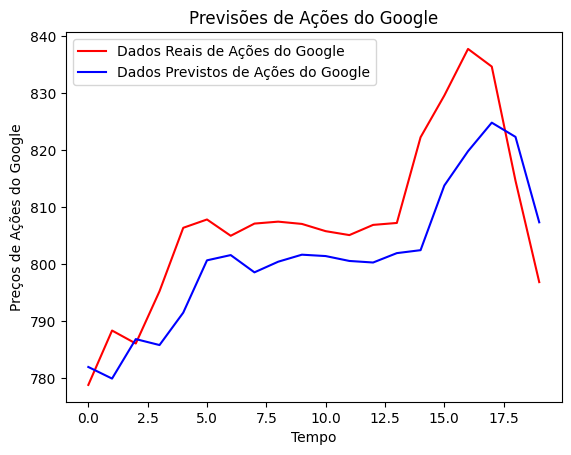

In [ ]:
plt.plot(real_stock_price, color='red', label="Dados Reais de Ações do Google")
plt.plot(predicted_stock_price, color='blue', label="Dados Previstos de Ações do Google")
plt.title("Previsões de Ações do Google")
plt.xlabel("Tempo")
plt.ylabel("Preços de Ações do Google")
plt.legend()
plt.show()